In [1]:
import sys
from os.path import expanduser

# Add path to folder containing safepy
sys.path.append(expanduser('~') + '/Lab/Utils/Python/Networks/')

from safepy import safe

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Example 1 -- Annotating the genetic interaction similarity network

In this example, SAFE is run with all the default settings:
* the network is the genetic interaction similarity network from Costanzo et al., 2016
* the attribute is a doxorubicin sensitivity screen from Hoepfner et al., 2014

In [2]:
sf = safe.SAFE()

In [3]:
sf.load_network()

Loading network from /Users/abaryshnikova/Lab/Datasets/safe-data/networks/Costanzo_Science_2016.gpickle


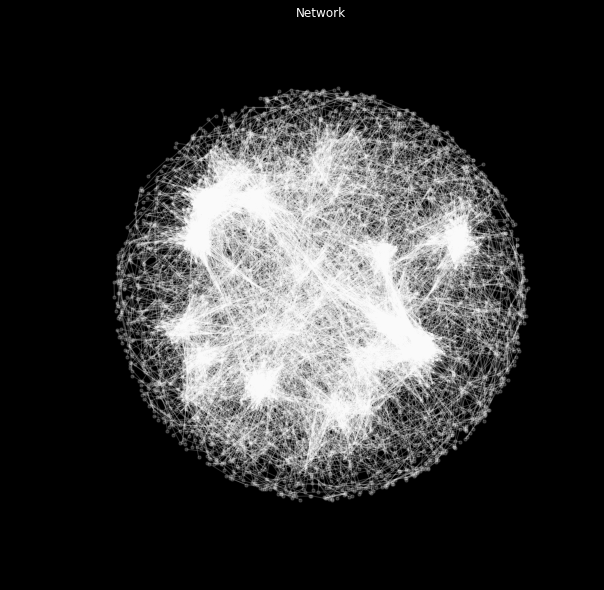

In [4]:
sf.plot_network()

In [5]:
sf.define_neighborhoods()

Node distance metric: shortpath_weighted_layout
Neighborhood definition: 0.10 x diameter
Number of nodes per neighborhood (mean +/- std): 37.50 +/- 56.74


In [6]:
sf.load_attributes()

Loading attributes from /Users/abaryshnikova/Lab/Datasets/safe-data/attributes/hoepfner_movva_2014_doxorubucin.txt
Number of attributes: 1
Values: 1315 NaNs
Values: 1 zeros
Values: 1335 positives
Values: 1320 negatives


#### NOTE
Alternatively to the default attribute, you can specify an attribute file to be used instead of the default settings:
    
```sf.load_attributes(attribute_file='hoepfner_movva_2014_doxorubucin.txt')```

For format specifications, check the example attribute file. The main format requirements are:
* the first column contains the node labels (in this case, yeast ORFs)
* each column is an attribute

In [7]:
sf.compute_pvalues()

The node attribute values appear to be quantitative. Using randomization to calculate enrichment...


100%|██████████| 1000/1000 [02:51<00:00,  5.73it/s]


#### NOTE

For a "quick & dirty" answer, you can decrease the number of network randomizations for estimating the enrichment p-values (the default is 1000):

```sf.compute_pvalues(num_permutations=100)```

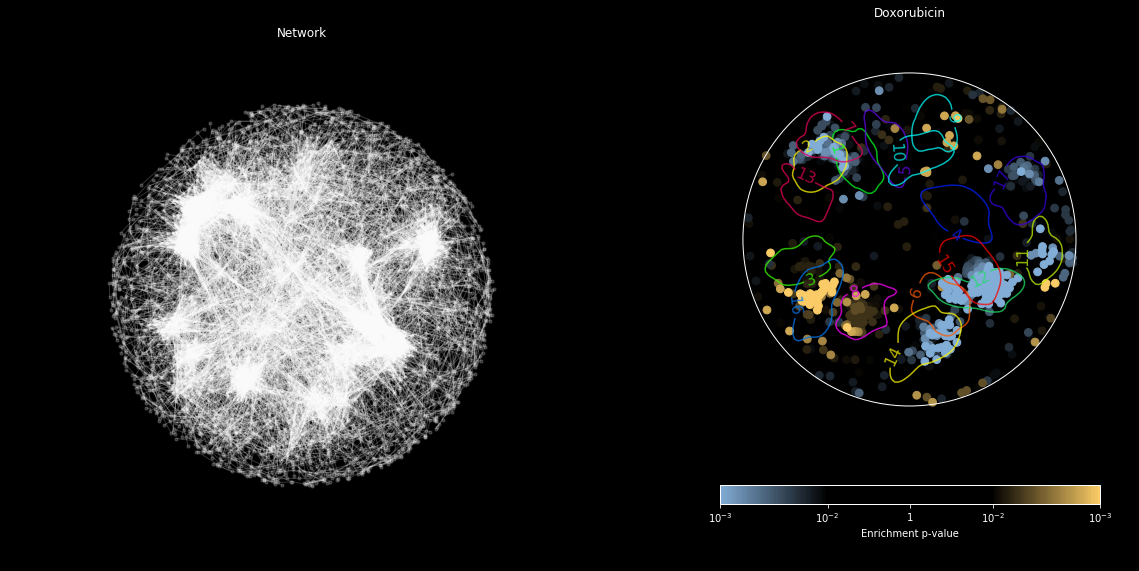

In [8]:
sf.plot_sample_attributes(show_colorbar=True, show_costanzo2016=True)

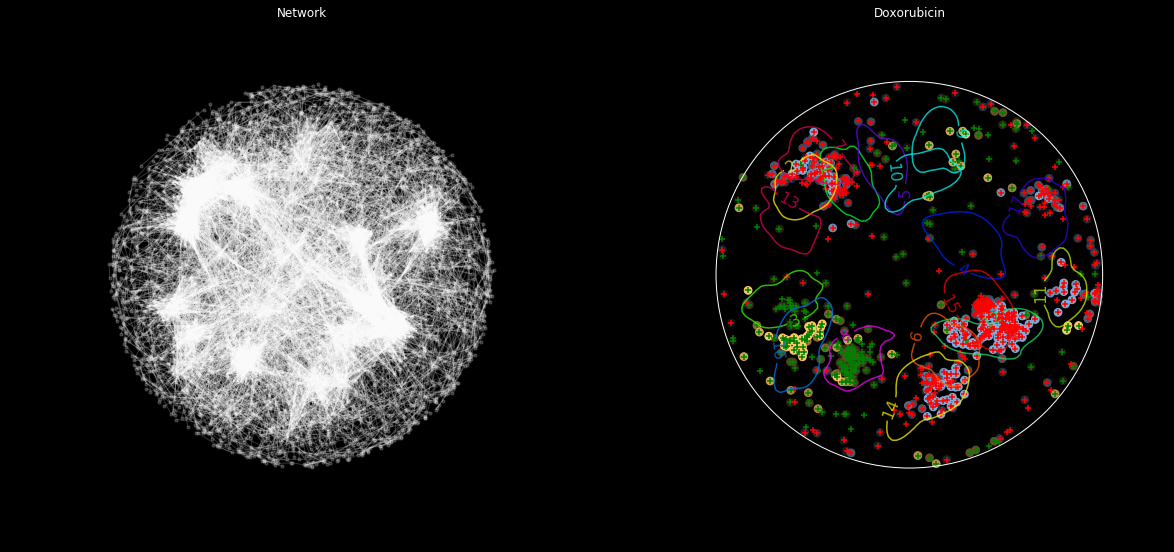

In [9]:
sf.plot_sample_attributes(show_significant_nodes=True, show_costanzo2016=True)

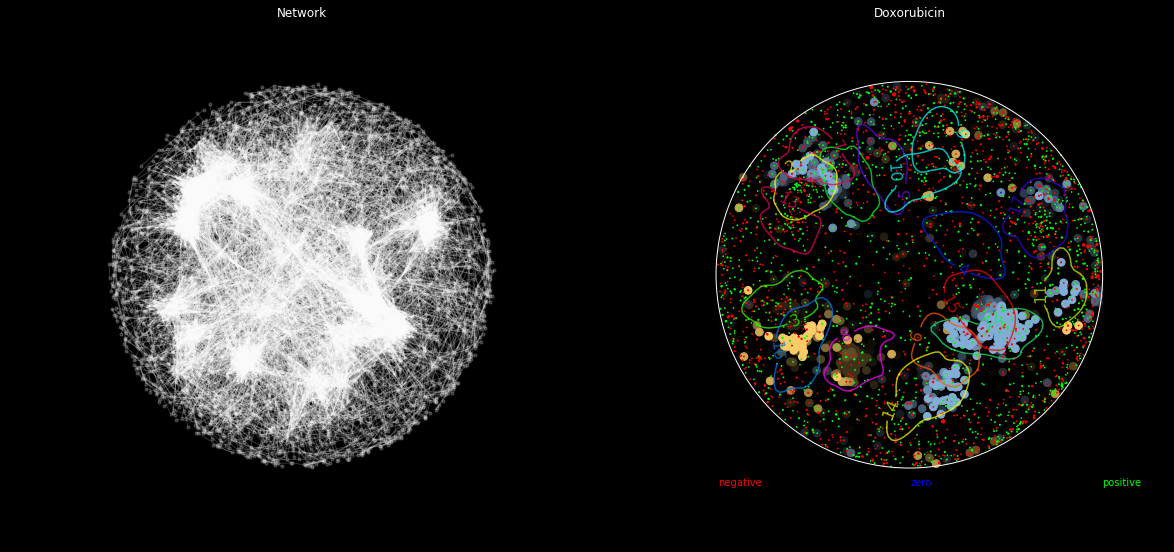

In [10]:
sf.plot_sample_attributes(show_raw_data=True, show_costanzo2016=True)

Show the figure and save it to a PDF file in the current folder

Output path: /Users/abaryshnikova/Lab/Utils/Python/Networks/safepy/examples/doxorubicin.pdf


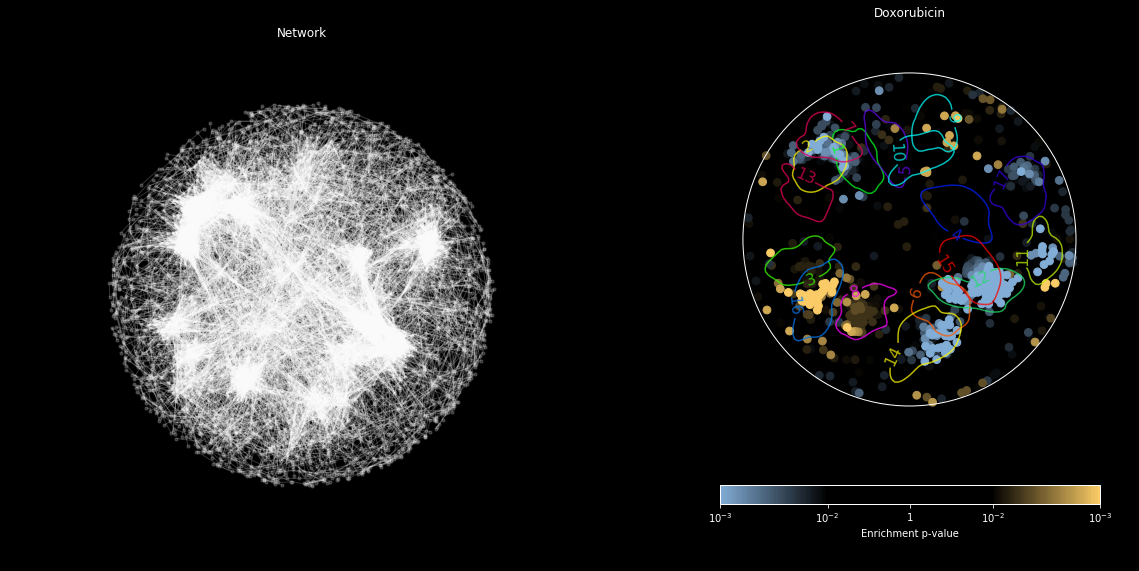

In [11]:
sf.plot_sample_attributes(show_colorbar=True, show_costanzo2016=True, save_fig='examples/doxorubicin.pdf')

In [12]:
sf.print_output_files()

Output path: /Users/abaryshnikova/Lab/Utils/Python/Networks/safepy


# Example 2 -- Annotating your own network with Gene Ontology

In [13]:
sf = safe.SAFE()

### Load and display the network

In [ ]:
# Option 1: Tab-delimited 3-column format (node1 label - node2 label - edge weight). 
# The node labels will be used as keys to map nodes to attributes and therefore have to match the node identifiers in the attribute file.

# sf.load_network(network_file='/Users/abaryshnikova/Lab/Datasets/safe-data/networks/Costanzo_Science_2010_3col.txt')

In [14]:
# Option 2: Tab-delimited 5-column format (node1 label - node1 key - node2 label - node2 key - edge weight).
# Here, the node keys (e.g., systematic gene names) are provided in addition to the node labels (e.g., common gene names).

sf.load_network(network_file='/Users/abaryshnikova/Lab/Datasets/safe-data/networks/Costanzo_Science_2010_5col.txt')

Loading network from /Users/abaryshnikova/Lab/Datasets/safe-data/networks/Costanzo_Science_2010_5col.txt
Applying the spring-embedded network layout... (may take several minutes)
Calculating edge lengths...


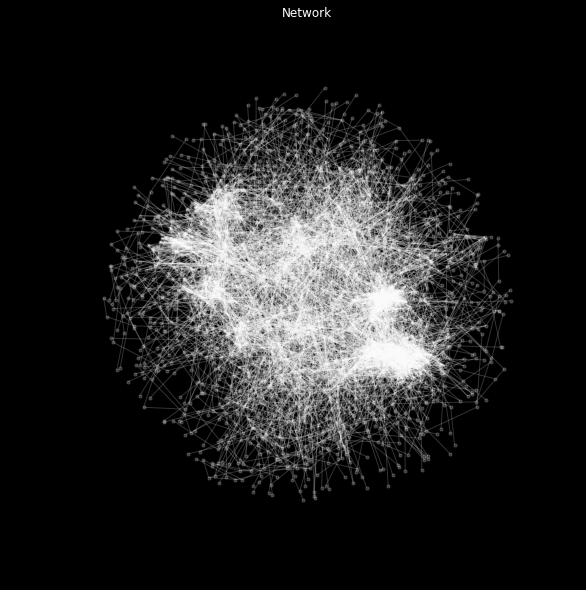

In [15]:
sf.plot_network()

### Load the attributes

The row labels in the attribute file have to match the node keys in the network.

In [17]:
sf.load_attributes(attribute_file='/Users/abaryshnikova/Lab/Datasets/safe-data/attributes/go_bp_140819.txt.gz')

Loading attributes from /Users/abaryshnikova/Lab/Datasets/safe-data/attributes/go_bp_140819.txt.gz
Number of attributes: 4373
Values: 979552 NaNs
Values: 11318109 zeros
Values: 112913 positives
Values: 0 negatives


### Define the local neighborhoods and compute their enrichment for each attribute

In [18]:
sf.define_neighborhoods(node_distance_metric='shortpath_weighted_layout', neighborhood_radius=0.15)

Node distance metric: shortpath_weighted_layout
Neighborhood definition: 0.15 x diameter
Number of nodes per neighborhood (mean +/- std): 26.33 +/- 41.42


In [19]:
sf.compute_pvalues()

The node attribute values appear to be binary. Using the hypergeometric test to calculate enrichment...


### Plot the enrichment landscapes of a sample of attributes

In [23]:
sf.attributes['name'].str.st

0                               mitochondrion inheritance
1                        mitochondrial genome maintenance
2                                            reproduction
3                                     vacuole inheritance
4                               alpha-glucoside transport
5                         regulation of DNA recombination
6                     regulation of mitotic recombination
7                              mitotic spindle elongation
8                               maltose metabolic process
9                               maltose catabolic process
10                       ribosomal large subunit assembly
11                       ribosomal small subunit assembly
12            cell wall mannoprotein biosynthetic process
13           very long-chain fatty acid metabolic process
14                        low-affinity iron ion transport
15                         transition metal ion transport
16                             protein targeting to Golgi
17            

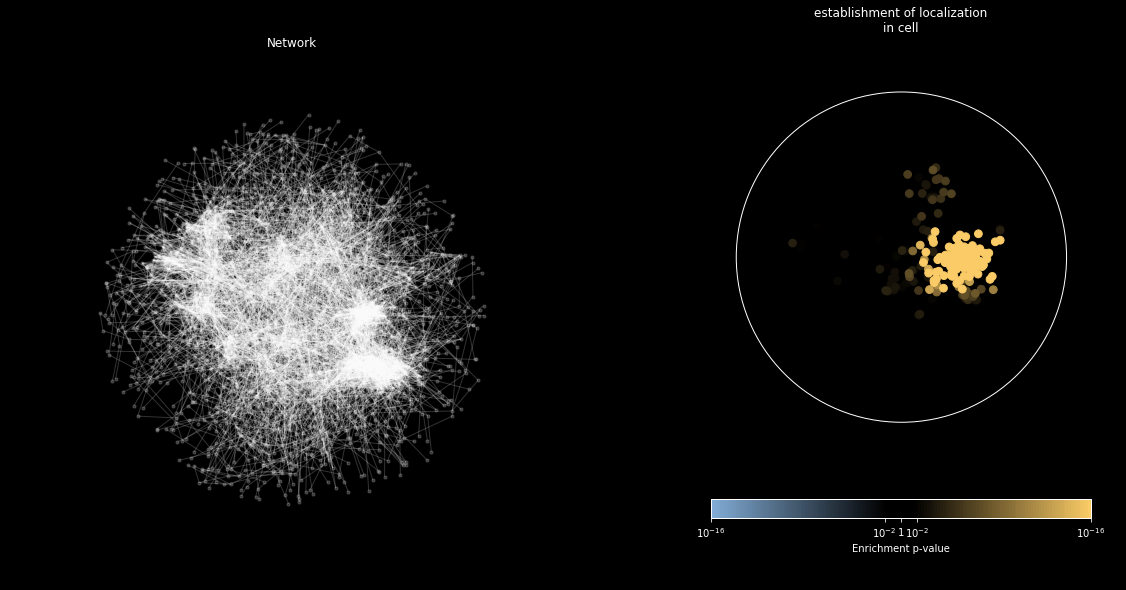

In [20]:
# Just the enrichment itself with min and max boundaries on the colormap
sf.plot_sample_attributes(attributes=[3377], show_colorbar=True, vmin=-16, vmax=16)

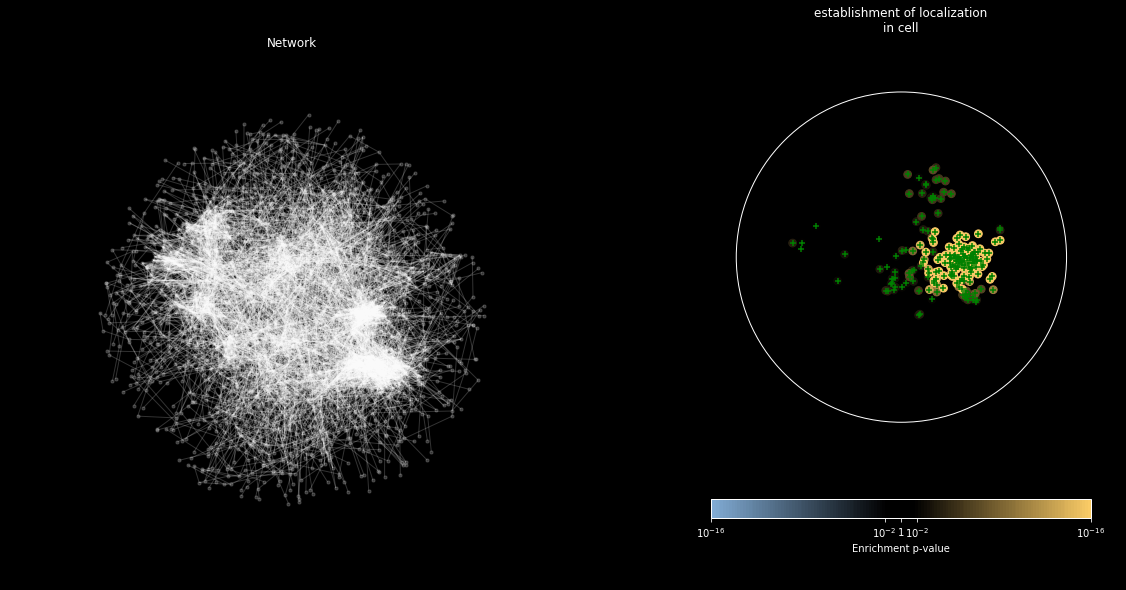

In [21]:
# Show the neighborhoods that are significant (p < 0.05 after Bonferroni correction)
sf.plot_sample_attributes(attributes=[3377], show_colorbar=True, show_significant_nodes=True, vmin=-16, vmax=16)

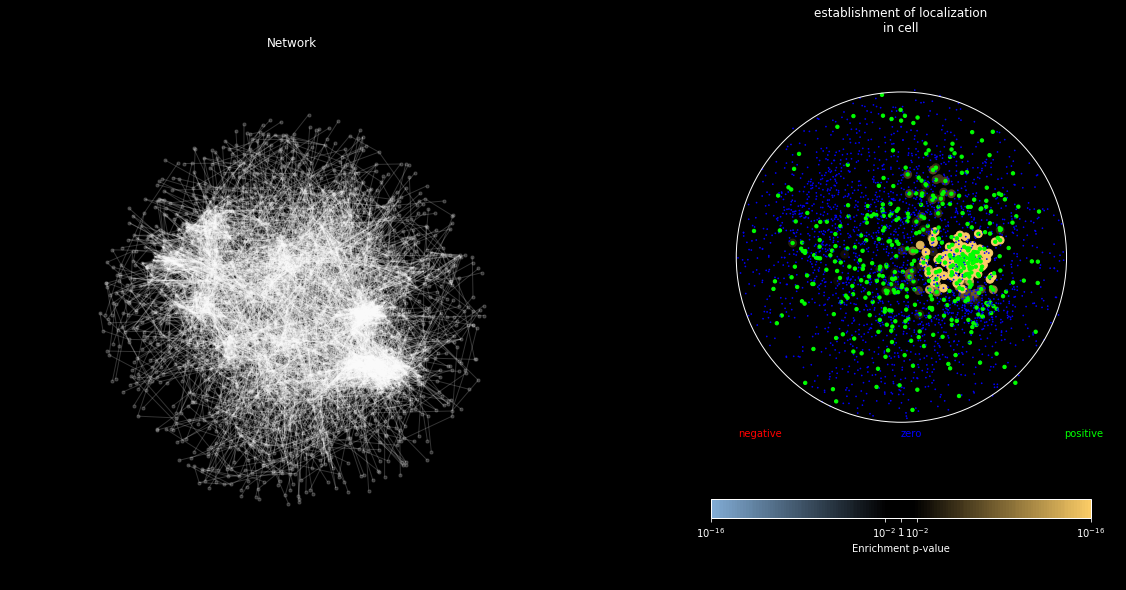

In [22]:
# Show the raw data (nodes annotated to this attribute)
sf.plot_sample_attributes(attributes=[3377], show_colorbar=True, show_raw_data=True, vmin=-16, vmax=16)

### Combine the enrichment landscapes into a single composite map

In [93]:
sf.define_top_attributes()

Number of top attributes: 421


In [94]:
sf.define_domains(attribute_distance_threshold = 0.65)

Number of domains: 39 (containing 1-74 attributes)


In [95]:
sf.trim_domains()

Removed 22 domains because they were the top choice for less than 10 neighborhoods.


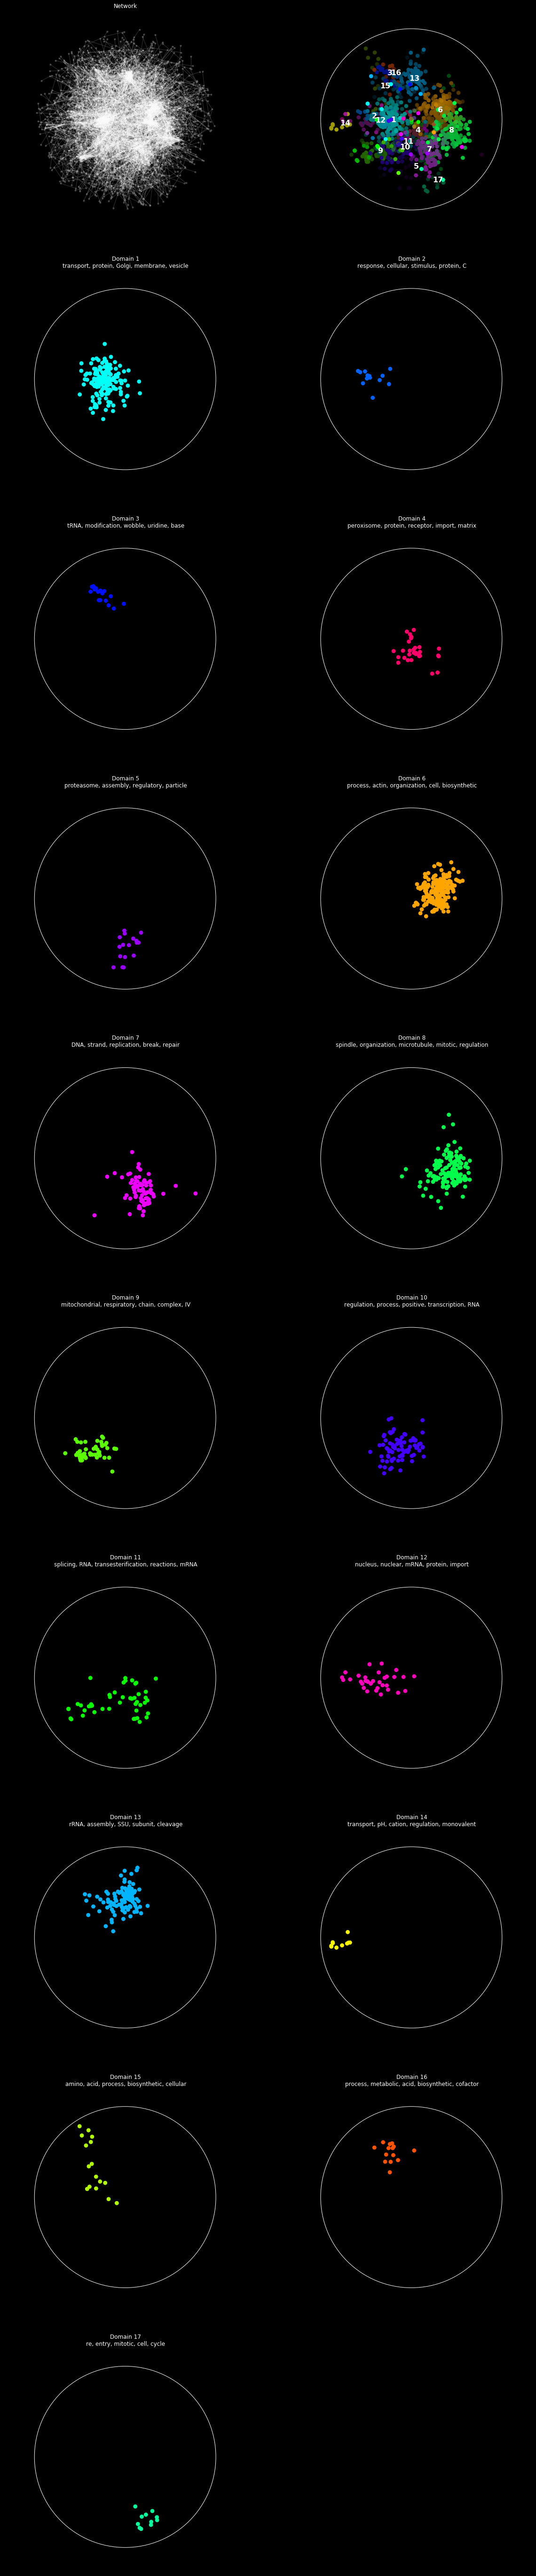

In [96]:
sf.plot_composite_network(show_each_domain=True)

In [100]:
sf.print_output_files()

Output path: /Users/abaryshnikova/Lab/Utils/Python/Networks/safepy
